## Objective:
## • Understand and practice linear discriminant analysis using scikit learn.

In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

### 1. We shall use the same dataset used in previous assignment - digits. Make a 80-20 train/test split.
[Hint: Explore datasets module from scikit learn]

In [2]:
digits = load_digits()

In [3]:
print(digits.data.shape)

(1797, 64)


In [4]:
X, Y = digits.data, digits.target

In [5]:
print(np.shape(X),np.shape(Y))

(1797, 64) (1797,)


In [6]:
## importing test train split package
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=48, stratify = Y)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


### 2. Using scikit learn perform a LDA on the dataset. Find out the number of components in the projected subspace.
[Hint: Refer to discriminant analysis module of scikit learn]

In [9]:
## Creating copy of test train split before doing PCA
X_train_orig = X_train
X_test_orig = X_test
y_train_orig = y_train
y_test_orig = y_test

In [10]:
## Apply Standardization before applying PCA transformation
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
# Fit on training set only.
scaler.fit(X_train)

StandardScaler()

In [13]:
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [18]:
lda = LinearDiscriminantAnalysis(solver='svd')

In [19]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [20]:
## Applying LDA Transformation to both traning and test dataset
X_train = lda.transform(X_train)
X_test = lda.transform(X_test)

In [23]:
print(X_train.shape,X_test.shape)

(1437, 9) (360, 9)


In [24]:
## Total number of components in LDA 
X_train.shape[1]

9

### 3. Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model based on PCA in terms of accuracy and model complexity.
[Hint: Project both the train and test samples to the new subspace]

In [25]:
## Importing Logistic regression Library
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)

In [27]:
lr.fit(X_train, y_train)

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [29]:
y_pred = lr.predict(X_test)

In [34]:
## Training Score
round(lr.score(X_train, y_train),3)

0.981

In [35]:
## Testing Score
round(lr.score(X_test, y_test),3)

0.936

In [30]:
from sklearn import metrics

In [31]:
cm = metrics.confusion_matrix(y_true=y_test, 
                                 y_pred = y_pred, 
                                 labels = lr.classes_)

In [32]:
print(cm)

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  2  0  0  0]
 [ 1  1 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  3  0]
 [ 1  1  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  1  1  1]
 [ 0  0  1  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  1  0  0  0  0  0  0 34  0]
 [ 1  0  0  1  1  0  0  1  3 29]]


In [36]:
wrong_img_index = []
image_cnt = 0
for orig,pred in zip(y_test,y_pred):
    if orig != pred:
        wrong_img_index.append(image_cnt)
    image_cnt += 1

In [39]:
## Wrong classified images are
print(len(wrong_img_index))

23


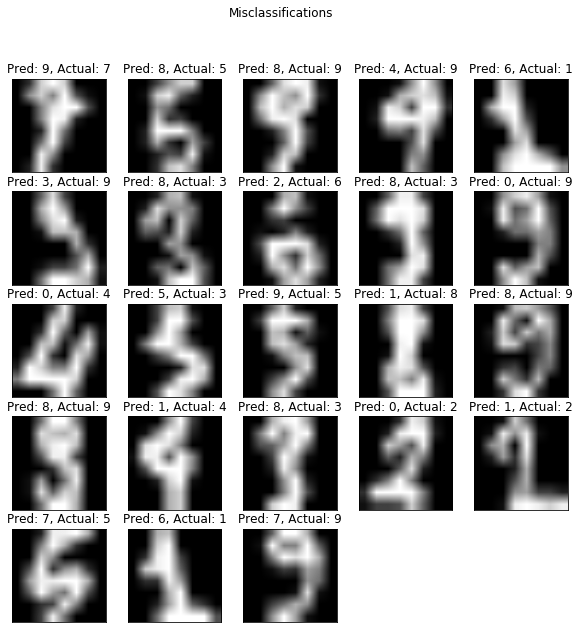

In [40]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(wrong_img_index):
    p = plt.subplot(5,5, plot_index+1)
    
    p.imshow(X_test_orig[bad_index].reshape(8,8), cmap=plt.cm.gray,interpolation='bilinear')
    p.set_xticks(())
    p.set_yticks(())
    
    p.set_title(f'Pred: {y_pred[bad_index]}, Actual: {y_test_orig[bad_index]}');

### PCA has much better accuracy as compared to LDA on LogisticRegression. 
### Although, LDA was able to check overfitting of the model.